In [ ]:

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
list.files(path = "../input")

In [4]:
install.packages('remotes')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
remotes::install_version(package = 'Seurat', version = package_version('2.3.0'))


Rcpp      (1.0.10 -> 1.0.11) [CRAN]
fs        (1.6.2  -> 1.6.3 ) [CRAN]
vctrs     (0.6.3  -> 0.6.4 ) [CRAN]
lifecycle (1.0.3  -> 1.0.4 ) [CRAN]
rlang     (1.1.1  -> 1.1.2 ) [CRAN]
utf8      (1.2.3  -> 1.2.4 ) [CRAN]
fansi     (1.0.4  -> 1.0.5 ) [CRAN]
dplyr     (1.1.2  -> 1.1.3 ) [CRAN]
httr      (1.4.6  -> 1.4.7 ) [CRAN]
mutoss    (NA     -> 0.1-13) [CRAN]
metap     (NA     -> 1.9   ) [CRAN]
Hmisc     (NA     -> 5.1-1 ) [CRAN]
ranger    (NA     -> 0.15.1) [CRAN]


Skipping 3 packages not available: multtest, htmlTable, SDMTools

Installing 15 packages: Rcpp, multtest, fs, vctrs, lifecycle, rlang, utf8, fansi, dplyr, httr, mutoss, metap, Hmisc, SDMTools, ranger

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“packages ‘multtest’, ‘SDMTools’ are not available for this version of R

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“dependency ‘multtest’ is not available”


In [6]:
library(Seurat)
library(Matrix)

# directory containing the matrix, features, and barcodes files
data_dir <- "/kaggle/input/mmmrtx/filtered_feature_bc_matrix/"


In [8]:
# Reading the matrix file
matrix <- readMM(paste0(data_dir, "matrix.mtx"))


In [16]:
# Reading the features file with all six columns
features <- read.delim(paste0(data_dir, "features.tsv"), header = FALSE, 
                       col.names = c("gene_id", "gene_name", "type", "chr", "start", "end"))


In [11]:
barcodes <- read.delim(paste0(data_dir, "barcodes.tsv"),header = FALSE)

In [17]:
print(head(features))



          gene_id   gene_name            type  chr  start    end
1 ENSG00000243485 MIR1302-2HG Gene Expression chr1  29553  30267
2 ENSG00000237613     FAM138A Gene Expression chr1  36080  36081
3 ENSG00000186092       OR4F5 Gene Expression chr1  65418  69055
4 ENSG00000238009  AL627309.1 Gene Expression chr1 120931 133723
5 ENSG00000239945  AL627309.3 Gene Expression chr1  91104  91105
6 ENSG00000239906  AL627309.2 Gene Expression chr1 140338 140339


In [22]:
# data frame that mirrors the structure of the matrix with gene IDs as row names
gene_info <- data.frame(genes = features$gene_id)
rownames(gene_info) <- features$gene_id

# Similarly for barcodes
barcode_info <- data.frame(barcodes = barcodes$barcodes)
rownames(barcode_info) <- barcodes$barcodes

# Ensuring that the matrix has dimnames set
dimnames(matrix) <- list(rownames(gene_info), rownames(barcode_info))



In [24]:
#  Seurat object
seurat <- CreateSeuratObject(counts = matrix, project = "Proj1rna", min.cells =3, min.features = 200)

In [25]:
# peak at the S. obj
str(seurat)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:113062684] 35 39 75 102 112 146 331 357 374 380 ...
  .. .. .. .. .. ..@ p       : int [1:10692] 0 6444 15486 26075 28593 35291 44861 72015 85346 95223 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 140869 10691
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:140869] "ENSG00000238009" "ENSG00000241860" "ENSG00000241599" "ENSG00000229905" ...
  .. .. .. .. .. .. ..$ : chr [1:10691] "AAACAGCCAACAACAA-1" "AAACAGCCAAGGACCA-1" "AAACAGCCACAATGCC-1" "AAACAGCCATGAGCAG-1" ...
  .. .. .. .. .. ..@ x       : num [1:113062684] 1 1 1 1 2 1 1 3 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i

In [26]:
## Quality Control


seurat[["percent.mt"]] <- PercentageFeatureSet(seurat, pattern = "^MT-")
View(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACAGCCAACAACAA-1,Proj1rna,15376,6444,0
AAACAGCCAAGGACCA-1,Proj1rna,21454,9042,0
AAACAGCCACAATGCC-1,Proj1rna,27063,10589,0
AAACAGCCATGAGCAG-1,Proj1rna,4994,2518,0
AAACATGCAAGATTCT-1,Proj1rna,14391,6698,0
AAACATGCACAACAAA-1,Proj1rna,23796,9570,0
AAACATGCACAACCTA-1,Proj1rna,81872,27154,0
AAACATGCAGCGCTTG-1,Proj1rna,32301,13331,0
AAACATGCAGGAAGCC-1,Proj1rna,24248,9877,0


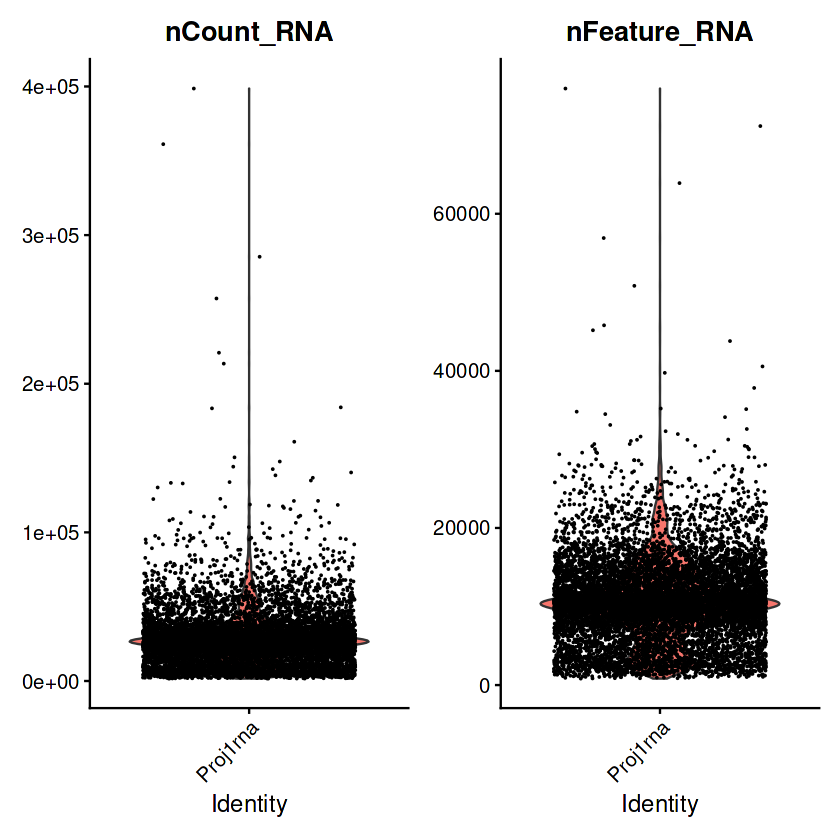

In [28]:
# Vln plot

VlnPlot(seurat, features = c("nCount_RNA", "nFeature_RNA"), ncol = 2)

`geom_smooth()` using formula = 'y ~ x'


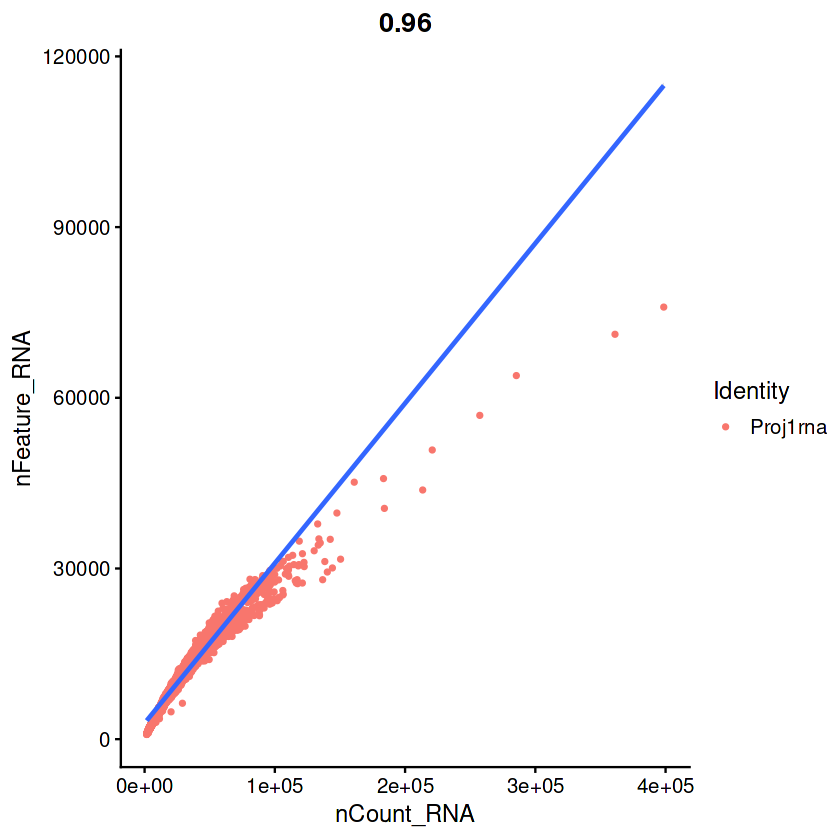

In [30]:
# Now, visaulization of the nr od Molecules

library(ggplot2)

FeatureScatter(seurat, feature1 = "nCount_RNA", feature2= "nFeature_RNA") +
    geom_smooth(method = 'lm')

In [31]:
#  Filtering


seurat <- subset(seurat, subset = nFeature_RNA > 200 & nFeature_RNA < 2500)

In [32]:
seurat

An object of class Seurat 
140869 features across 508 samples within 1 assay 
Active assay: RNA (140869 features, 0 variable features)

In [33]:
# Normalize

seurat <- NormalizeData(seurat)

In [34]:
str(seurat)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:954231] 223 317 357 413 436 493 649 874 1119 1120 ...
  .. .. .. .. .. ..@ p       : int [1:509] 0 1910 4145 6388 8729 9861 11463 13174 14882 17146 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 140869 508
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:140869] "ENSG00000238009" "ENSG00000241860" "ENSG00000241599" "ENSG00000229905" ...
  .. .. .. .. .. .. ..$ : chr [1:508] "AAACATGCATGCATAT-1" "AAACATGCATTCCTGT-1" "AAACGCGCAGCGCTTG-1" "AAACGCGCATTATGGT-1" ...
  .. .. .. .. .. ..@ x       : num [1:954231] 1 1 1 2 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : in

In [35]:
#  Identifying highly variable features ---


seurat <- FindVariableFeatures(seurat, selection.method = "vst", nfeatures = 2000)



Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.7278”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.32298”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”


In [38]:
# identify the 10 most highy variable genes

top10 <- head(VariableFeatures(seurat), 10)

top10

[1] "ENSG00000115523"        "ENSG00000211592"        "ENSG00000211899"       
 [4] "ENSG00000090382"        "ENSG00000144218"        "ENSG00000019582"       
 [7] "ENSG00000105835"        "ENSG00000124882"        "ENSG00000153064"       
[10] "chr3:93470134-93471048"

In [42]:
# Plotting variable features

plot1 <- VariableFeaturePlot(seurat)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


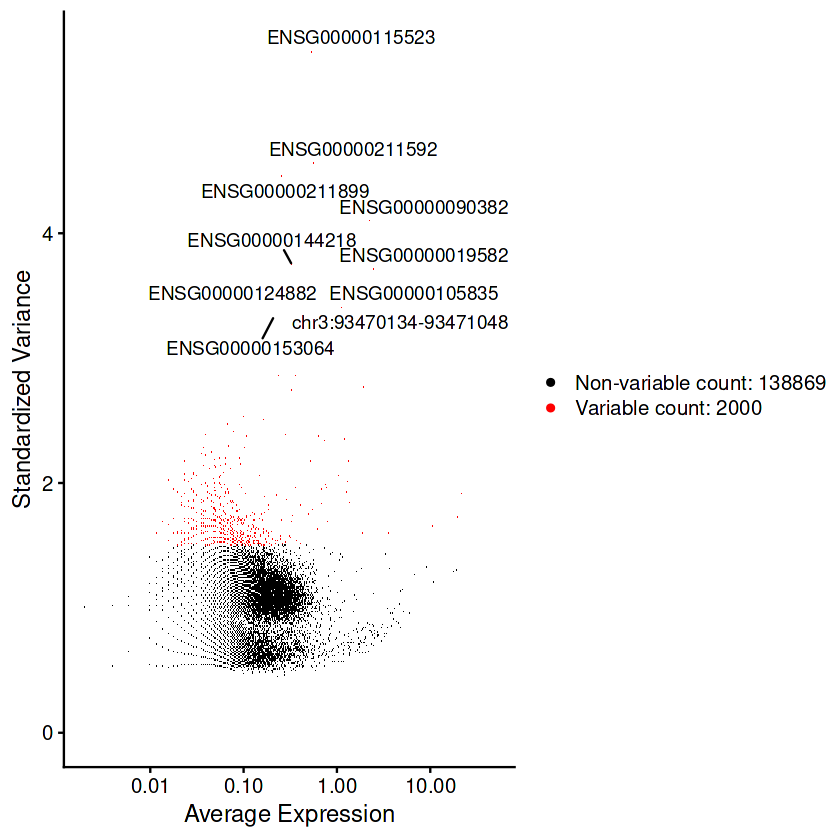

In [43]:
LabelPoints(plot = plot1, points = top10, repel = TRUE)

In [44]:
# Scaling the data

all.genes <- rownames(seurat)
seurat <- ScaleData(seurat, features = all.genes)

Centering and scaling data matrix



In [45]:
#  Performing Linear Dimensionality Reduction ------

seurat <- RunPCA(seurat, features = VariableFeatures(object = seurat))

PC_ 1 
Positive:  ENSG00000120594, ENSG00000105835, ENSG00000038427, ENSG00000119535, ENSG00000148655, ENSG00000085265, ENSG00000070961, ENSG00000033327, ENSG00000245532, ENSG00000254087 
	   ENSG00000169554, ENSG00000090382, ENSG00000197746, ENSG00000104093, ENSG00000112149, ENSG00000130066, ENSG00000188641, ENSG00000183023, ENSG00000182621, ENSG00000145819 
	   ENSG00000151726, ENSG00000125538, ENSG00000168461, ENSG00000019582, ENSG00000204287, ENSG00000122862, ENSG00000198804, ENSG00000011422, ENSG00000163694, ENSG00000138639 
Negative:  chr9:79571241-79572163, chr12:56645677-56646597, chr19:41120754-41121648, chr17:57084744-57085595, chr5:157265687-157266538, chr4:7649560-7650479, chr17:7484038-7484962, chr16:31032893-31033757, chr2:183037973-183038844, chr14:24633895-24634807 
	   chr19:45770187-45770989, chr7:56051235-56052141, chr16:25257371-25258255, chr21:46425371-46426252, chr17:58083022-58083764, chr6:143842820-143843740, chr13:24618221-24619122, chr2:241762712-241763647, ch

In [46]:
#  Visualizing  PCA  results

print(seurat[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  ENSG00000120594, ENSG00000105835, ENSG00000038427, ENSG00000119535, ENSG00000148655 
Negative:  chr9:79571241-79572163, chr12:56645677-56646597, chr19:41120754-41121648, chr17:57084744-57085595, chr5:157265687-157266538 
PC_ 2 
Positive:  ENSG00000251562, ENSG00000166710, ENSG00000198712, ENSG00000112182, ENSG00000198804 
Negative:  chr20:50292280-50293170, chr3:93470134-93471048, chr13:113607160-113608065, chr14:35366070-35366674, chr10:12265506-12266357 
PC_ 3 
Positive:  ENSG00000153064, ENSG00000196092, ENSG00000211899, ENSG00000247982, ENSG00000105369 
Negative:  ENSG00000122862, ENSG00000145819, ENSG00000038427, ENSG00000182621, ENSG00000120594 
PC_ 4 
Positive:  chr20:8073126-8074046, chr2:12073953-12074823, chr14:89504340-89505171, ENSG00000166710, chr17:76000190-76001073 
Negative:  chr20:45946114-45946970, chr8:55885349-55886230, chr20:50385958-50386876, chr3:71421720-71422631, chr7:28179376-28180293 
PC_ 5 
Positive:  chr19:48967292-48968224, chr5:180069550

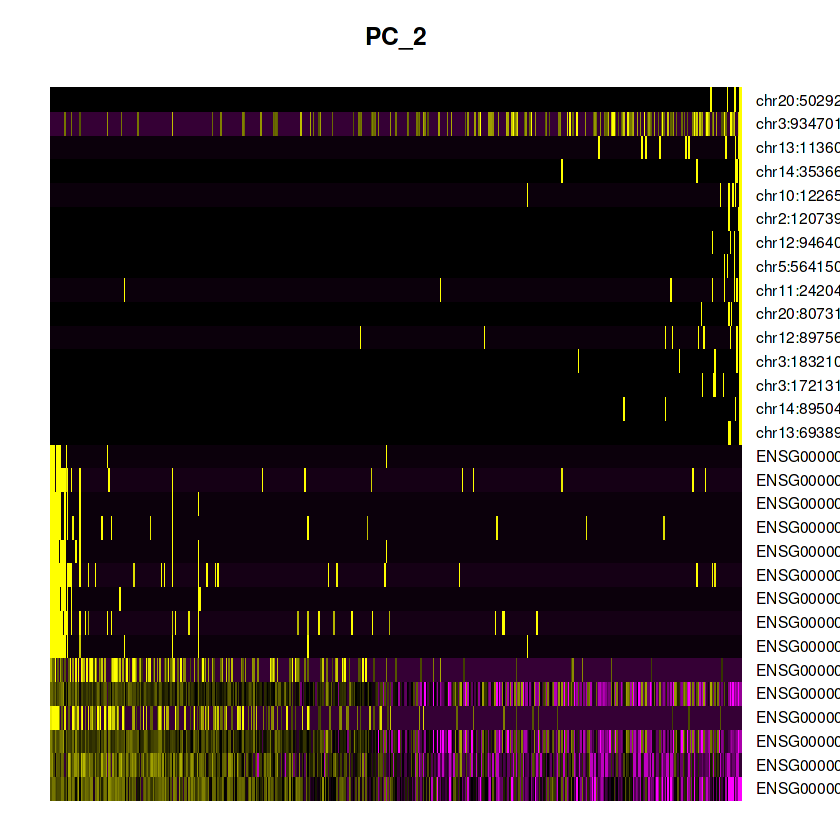

In [48]:
# Heat map

DimHeatmap(seurat, dims = 2, cells = 500, balanced = TRUE)

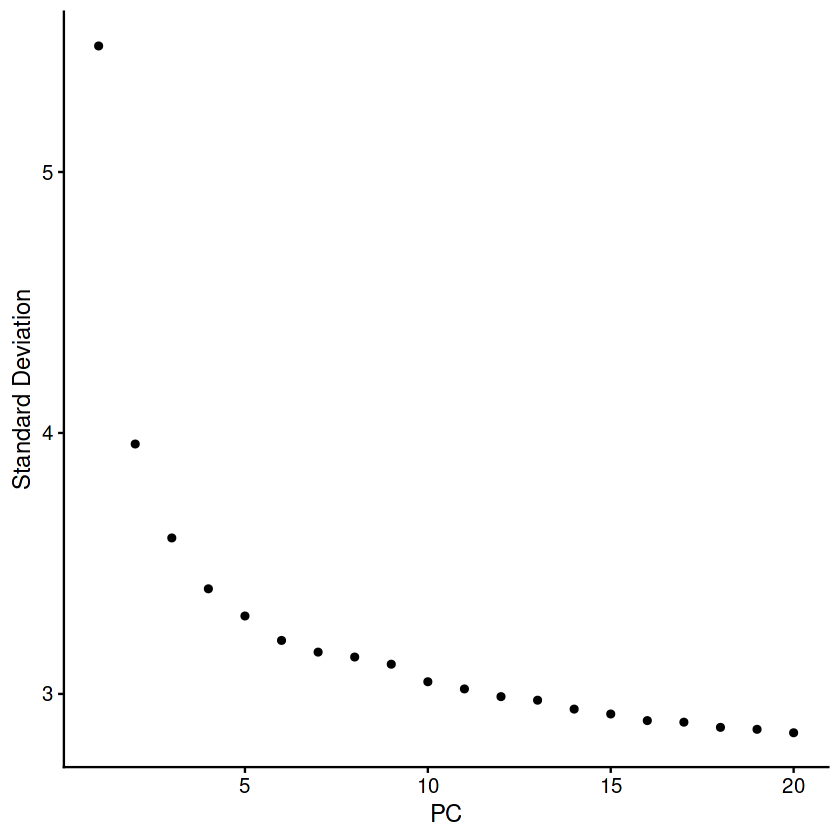

In [49]:
# determining Dimensionality of the data

ElbowPlot(seurat)

In [52]:
# 7. Clustering ------------

seurat <- FindNeighbors(seurat, dims = 1:15)

Computing nearest neighbor graph

Computing SNN



In [53]:
# understanding resolution

seurat <- FindClusters(seurat, resolution = c(0.1,0.3, 0.5, 0.7, 1))
View(seurat@meta.data)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 508
Number of edges: 20364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 3
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 508
Number of edges: 20364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8212
Number of communities: 4
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 508
Number of edges: 20364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7490
Number of communities: 5
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 508
Number of edges: 20364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6797
Number of communities: 5
Elapsed time: 0 seconds
Modularity Optimizer version

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.1,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.7,RNA_snn_res.1,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACATGCATGCATAT-1,Proj1rna,3574,1910,0,1,2,2,2,3,3
AAACATGCATTCCTGT-1,Proj1rna,4205,2235,0,0,1,1,1,1,1
AAACGCGCAGCGCTTG-1,Proj1rna,4232,2243,0,0,1,1,1,2,2
AAACGCGCATTATGGT-1,Proj1rna,4622,2341,0,0,0,0,0,4,4
AAACGTACAGGATAAC-1,Proj1rna,1827,1132,0,0,1,1,1,2,2
AAAGCCCGTATGTGGC-1,Proj1rna,3004,1602,0,0,1,1,1,2,2
AAAGCCCGTCACGGAT-1,Proj1rna,3043,1711,0,0,1,1,1,2,2
AAAGCCCGTCTTTATG-1,Proj1rna,3631,1708,0,2,3,4,4,6,6
AAAGCCCGTTTAGTCC-1,Proj1rna,4081,2264,0,1,2,2,2,3,3


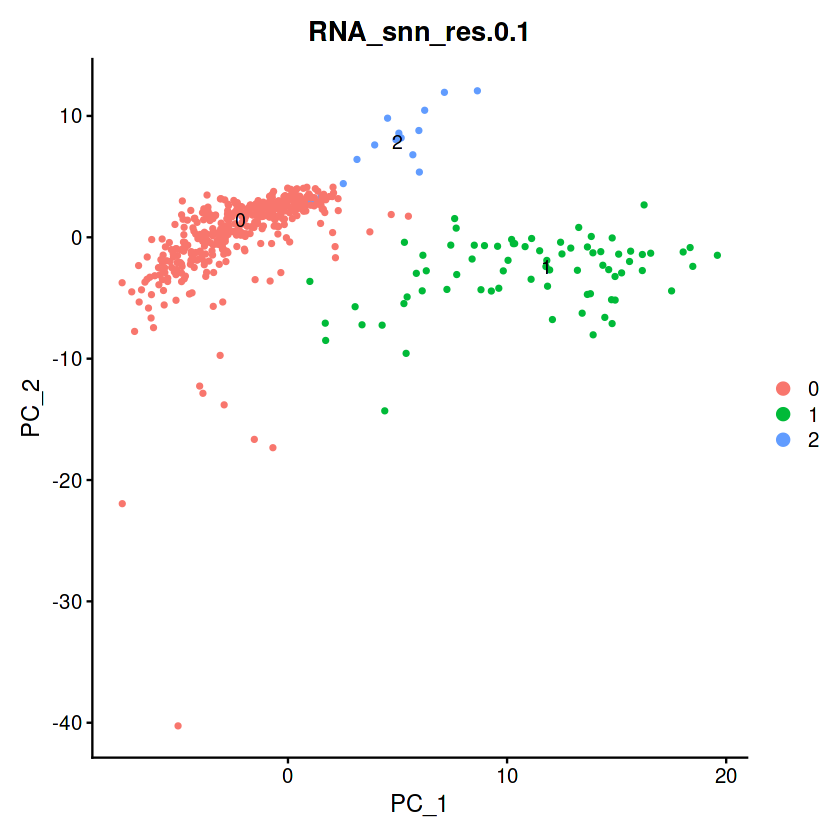

In [56]:
DimPlot(seurat, group.by = "RNA_snn_res.0.1", label = TRUE)

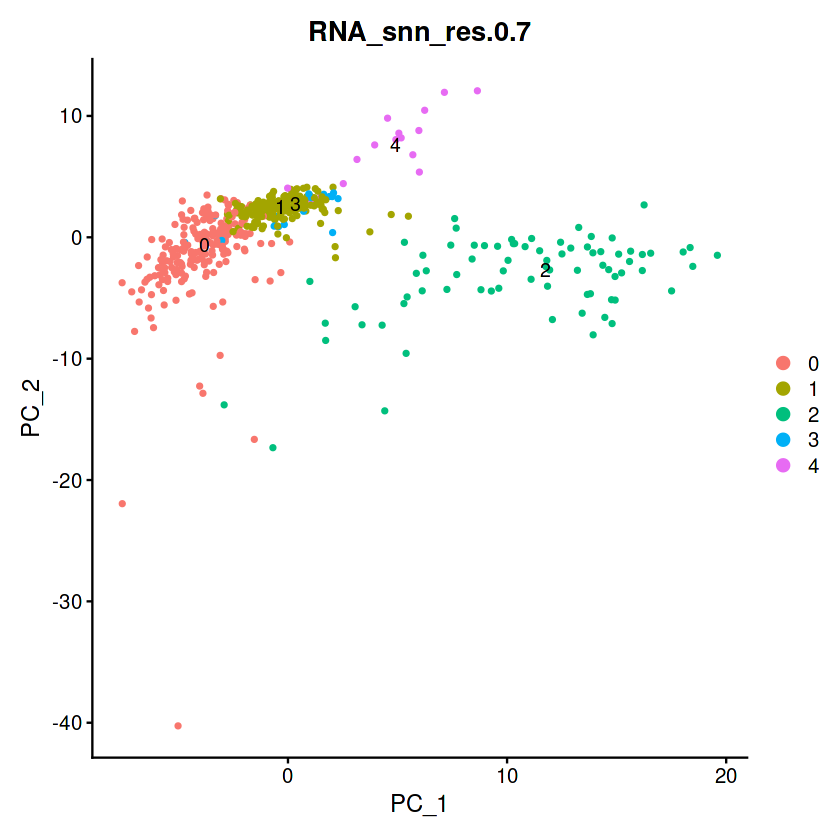

In [55]:
DimPlot(seurat, group.by = "RNA_snn_res.0.7", label = TRUE)

In [57]:
# setting Identity of clusters
Idents(seurat)

AAACATGCATGCATAT-1 AAACATGCATTCCTGT-1 AAACGCGCAGCGCTTG-1 AAACGCGCATTATGGT-1 
                 3                  1                  2                  4 
AAACGTACAGGATAAC-1 AAAGCCCGTATGTGGC-1 AAAGCCCGTCACGGAT-1 AAAGCCCGTCTTTATG-1 
                 2                  2                  2                  6 
AAAGCCCGTTTAGTCC-1 AAAGCCGCACCCTCAC-1 AAAGCCGCACGTTACA-1 AACAAAGGTTCCAGGG-1 
                 3                  1                  2                  0 
AACATCATCTCTAGCC-1 AACTACTCAAGGTGCA-1 AACTGTTCATCCCTCA-1 AACTTAGTCAATGAGG-1 
                 2                  2                  4                  1 
AAGACAAGTCCGTAGG-1 AAGCCACGTAACCTAG-1 AAGCCTTAGGCATGAA-1 AAGCGCTGTAAAGCGG-1 
                 0                  1                  0                  4 
AAGCGCTGTACGTTTC-1 AAGCGGGTCGCATCCT-1 AAGGAAGCAATTGCGC-1 AAGGAAGCACAAAGCG-1 
                 0                  1                  2                  5 
AAGGAAGCAGGGAGGA-1 AAGGAAGCAGGTTCAC-1 AAGGCCCTCATTAGCA-1 AAGGTGCAGCTAGAAG-1 
                 1                  2                  0                  3 
AAGTGAAGTTAAGGCC-1 AAGTGTTGTGGTTCCC-1 AATCCTAAGCATGACT-1 AATCTTGAGCCTGATG-1 
                 1                  1                  0                  6 
AATGGCGCAAACCCTA-1 AATTGCCAGCGAGGTG-1 AATTTGGTCACTCGCT-1 ACAACATGTTGGATAT-1 
                 3                  0                  5                  2 
ACACTTGCAATAGTCT-1 ACACTTGCATTGCGGT-1 ACAGCCGGTCTTGCTG-1 ACAGCGCTCTACCTCA-1 
                 3                  1                  5                  6 
ACAGTATGTCTTGCTG-1 ACATTGCAGGAGTAAT-1 ACATTGCAGGTACCGC-1 ACCAAGTTCCTAAGTA-1 
                 3                  1                  3                  3 
ACCACATAGAGCCGGA-1 ACCCAACCAGGTTTGC-1 ACCCGCTGTAACGAGG-1 ACCCGCTGTAGCCTCC-1 
                 1                  0                  2                  2 
ACCCGCTGTTAGGTTG-1 ACCCGGTAGACTCGCA-1 ACCCTCCCAAGCCAGA-1 ACCGGTTCAGCATTAT-1 
                 4                  0                  2                  5 
ACCTCACTCAAGACTC-1 ACCTGGATCGTCATTT-1 ACGAACAAGCGCTAAT-1 ACGCAAGCAGTTTGGC-1 
                 1                  1                  1                  2 
ACGCCACAGGACTAAG-1 ACGCCTAAGTCGCAAT-1 ACTAACCAGGATCCGC-1 ACTAACGGTGGAAACG-1 
                 1                  1                  1                  0 
ACTATCCGTACTAAAC-1 ACTCGCTTCAATACGC-1 ACTTAGTCAGGTCCTG-1 ACTTATGAGTTACTTC-1 
                 5                  0                  0                  3 
ACTTGTCGTATGTGGC-1 AGAATCGAGTATGTGC-1 AGACTATGTACTAAAC-1 AGACTATGTTTCCTCC-1 
                 3                  6                  2                  1 
AGATGAAGTTAGCGTA-1 AGCAACAAGCGTGCAC-1 AGCAATACAACACCTA-1 AGCCTAAGTCGCATAA-1 
                 0                  1                  4                  0 
AGCCTAGTCATCCTAT-1 AGCGGACCACAAGCCT-1 AGCGGATAGGACTAAG-1 AGCTAGTTCAGGTTTA-1 
                 0                  5                  1                  1 
AGCTCATAGAAAGCAT-1 AGCTTCCTCCGTTATT-1 AGCTTGGTCACTCAAA-1 AGGAAACGTTAAGTGT-1 
                 1                  2                  3                  2 
AGGAACCAGATACTTG-1 AGGAACGGTTGCAGTA-1 AGGATGCAGGGATGAC-1 AGGTAACCATGTCGCG-1 
                 2                  2                  4                  1 
AGGTGAATCTTAGTCT-1 AGTAAACAGCTTCTCA-1 AGTAGCTTCGGTTACG-1 AGTAGGATCCTAAGAC-1 
                 0                  1                  4                  0 
AGTCGCATCAAGCTTA-1 AGTCGCATCCTCCATA-1 AGTGAACCATGGTTAT-1 AGTGCCGGTCCTGATT-1 
                 0                  0                  4                  6 
AGTGGACAGGACTTAC-1 AGTGTGGCAGCAAGTG-1 AGTTGGCGTTACGCAA-1 AGTTGTCAGCCAAATC-1 
                 3                  3                  1                  3 
ATATAGGCAATTGCGC-1 ATCAATCCACCATATG-1 ATCCCGCGTTAGAGCC-1 ATCCGTGAGGAGCATA-1 
                 1                  0                  3                  3 
ATCCTTAGTACGATTG-1 ATCGCTTGTTGAAGCC-1 ATGATGACAGACAAAC-1 ATGATGACATTATGGT-1 
                 1                  4                  0                 

In [59]:
# lets set the id to 0.1

Idents(seurat) <- "RNA_snn_res.0.1"

In [60]:
Idents(seurat)

AAACATGCATGCATAT-1 AAACATGCATTCCTGT-1 AAACGCGCAGCGCTTG-1 AAACGCGCATTATGGT-1 
                 1                  0                  0                  0 
AAACGTACAGGATAAC-1 AAAGCCCGTATGTGGC-1 AAAGCCCGTCACGGAT-1 AAAGCCCGTCTTTATG-1 
                 0                  0                  0                  2 
AAAGCCCGTTTAGTCC-1 AAAGCCGCACCCTCAC-1 AAAGCCGCACGTTACA-1 AACAAAGGTTCCAGGG-1 
                 1                  0                  0                  0 
AACATCATCTCTAGCC-1 AACTACTCAAGGTGCA-1 AACTGTTCATCCCTCA-1 AACTTAGTCAATGAGG-1 
                 0                  0                  0                  0 
AAGACAAGTCCGTAGG-1 AAGCCACGTAACCTAG-1 AAGCCTTAGGCATGAA-1 AAGCGCTGTAAAGCGG-1 
                 0                  0                  0                  0 
AAGCGCTGTACGTTTC-1 AAGCGGGTCGCATCCT-1 AAGGAAGCAATTGCGC-1 AAGGAAGCACAAAGCG-1 
                 0                  0                  0                  0 
AAGGAAGCAGGGAGGA-1 AAGGAAGCAGGTTCAC-1 AAGGCCCTCATTAGCA-1 AAGGTGCAGCTAGAAG-1 
                 0                  0                  0                  1 
AAGTGAAGTTAAGGCC-1 AAGTGTTGTGGTTCCC-1 AATCCTAAGCATGACT-1 AATCTTGAGCCTGATG-1 
                 0                  0                  0                  2 
AATGGCGCAAACCCTA-1 AATTGCCAGCGAGGTG-1 AATTTGGTCACTCGCT-1 ACAACATGTTGGATAT-1 
                 1                  0                  0                  0 
ACACTTGCAATAGTCT-1 ACACTTGCATTGCGGT-1 ACAGCCGGTCTTGCTG-1 ACAGCGCTCTACCTCA-1 
                 1                  0                  0                  2 
ACAGTATGTCTTGCTG-1 ACATTGCAGGAGTAAT-1 ACATTGCAGGTACCGC-1 ACCAAGTTCCTAAGTA-1 
                 1                  0                  1                  1 
ACCACATAGAGCCGGA-1 ACCCAACCAGGTTTGC-1 ACCCGCTGTAACGAGG-1 ACCCGCTGTAGCCTCC-1 
                 0                  0                  0                  0 
ACCCGCTGTTAGGTTG-1 ACCCGGTAGACTCGCA-1 ACCCTCCCAAGCCAGA-1 ACCGGTTCAGCATTAT-1 
                 0                  0                  0                  0 
ACCTCACTCAAGACTC-1 ACCTGGATCGTCATTT-1 ACGAACAAGCGCTAAT-1 ACGCAAGCAGTTTGGC-1 
                 0                  0                  0                  0 
ACGCCACAGGACTAAG-1 ACGCCTAAGTCGCAAT-1 ACTAACCAGGATCCGC-1 ACTAACGGTGGAAACG-1 
                 0                  0                  0                  0 
ACTATCCGTACTAAAC-1 ACTCGCTTCAATACGC-1 ACTTAGTCAGGTCCTG-1 ACTTATGAGTTACTTC-1 
                 0                  0                  0                  1 
ACTTGTCGTATGTGGC-1 AGAATCGAGTATGTGC-1 AGACTATGTACTAAAC-1 AGACTATGTTTCCTCC-1 
                 1                  2                  0                  0 
AGATGAAGTTAGCGTA-1 AGCAACAAGCGTGCAC-1 AGCAATACAACACCTA-1 AGCCTAAGTCGCATAA-1 
                 0                  0                  0                  0 
AGCCTAGTCATCCTAT-1 AGCGGACCACAAGCCT-1 AGCGGATAGGACTAAG-1 AGCTAGTTCAGGTTTA-1 
                 0                  0                  0                  0 
AGCTCATAGAAAGCAT-1 AGCTTCCTCCGTTATT-1 AGCTTGGTCACTCAAA-1 AGGAAACGTTAAGTGT-1 
                 0                  0                  1                  0 
AGGAACCAGATACTTG-1 AGGAACGGTTGCAGTA-1 AGGATGCAGGGATGAC-1 AGGTAACCATGTCGCG-1 
                 0                  0                  0                  0 
AGGTGAATCTTAGTCT-1 AGTAAACAGCTTCTCA-1 AGTAGCTTCGGTTACG-1 AGTAGGATCCTAAGAC-1 
                 0                  0                  0                  0 
AGTCGCATCAAGCTTA-1 AGTCGCATCCTCCATA-1 AGTGAACCATGGTTAT-1 AGTGCCGGTCCTGATT-1 
                 0                  0                  0                  2 
AGTGGACAGGACTTAC-1 AGTGTGGCAGCAAGTG-1 AGTTGGCGTTACGCAA-1 AGTTGTCAGCCAAATC-1 
                 1                  1                  0                  1 
ATATAGGCAATTGCGC-1 ATCAATCCACCATATG-1 ATCCCGCGTTAGAGCC-1 ATCCGTGAGGAGCATA-1 
                 0                  0                  0                  1 
ATCCTTAGTACGATTG-1 ATCGCTTGTTGAAGCC-1 ATGATGACAGACAAAC-1 ATGATGACATTATGGT-1 
                 0                  0                  0                 

In [61]:
reticulate::py_install(packages = 'umap-learn')

+ '/root/.local/share/r-miniconda/bin/conda' 'install' '--yes' '--prefix' '/root/.local/share/r-miniconda/envs/r-reticulate' '-c' 'conda-forge' 'umap-learn'



In [63]:
# we can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(seurat, reduction = "umap-learn")

ERROR: Error: Cannot find 'umap-learn' in this Seurat object
